In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
#---------------------------------------
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')


2025-04-16 00:19:49.468013: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-16 00:19:49.475275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744741189.483406  569556 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744741189.485780  569556 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744741189.492229  569556 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load Training Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
tr_df = train_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Training')
tr_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,meningioma
...,...,...
5707,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5708,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5709,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma
5710,/home/readinggroup/Desktop/K_venv/dl/MRI/Train...,glioma


# Load Test Data

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing')
ts_df

,Class Path,Class
0,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
2,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
3,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
4,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
...,...,...
1306,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1307,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1308,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
1309,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma


# Number of images in each class in train data

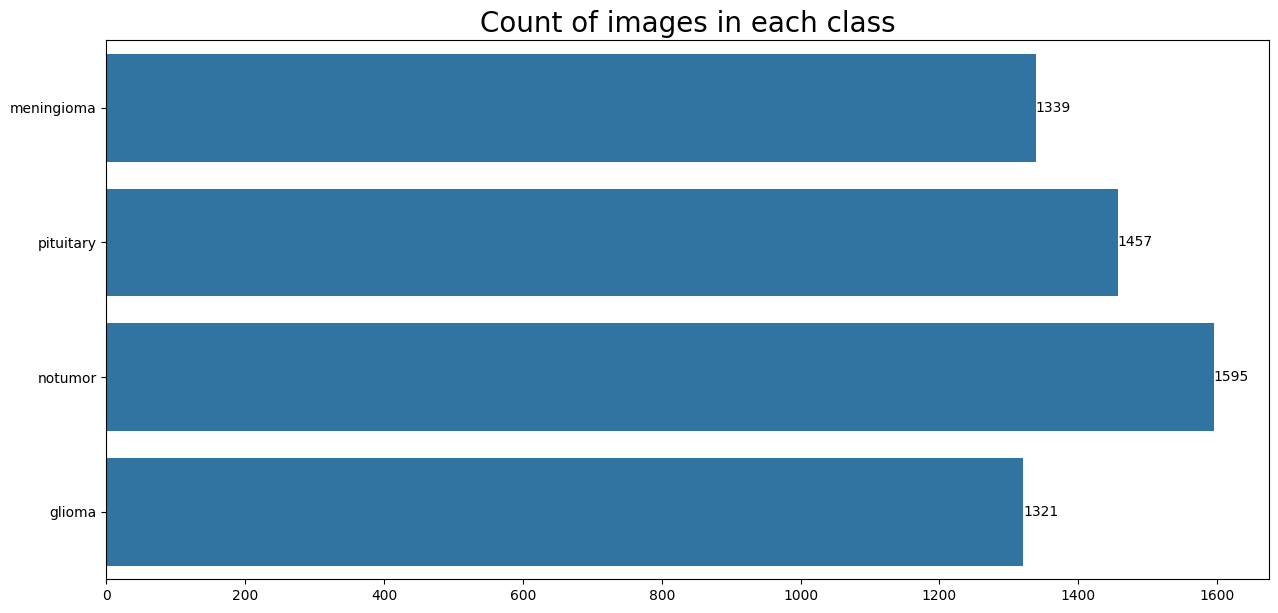

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

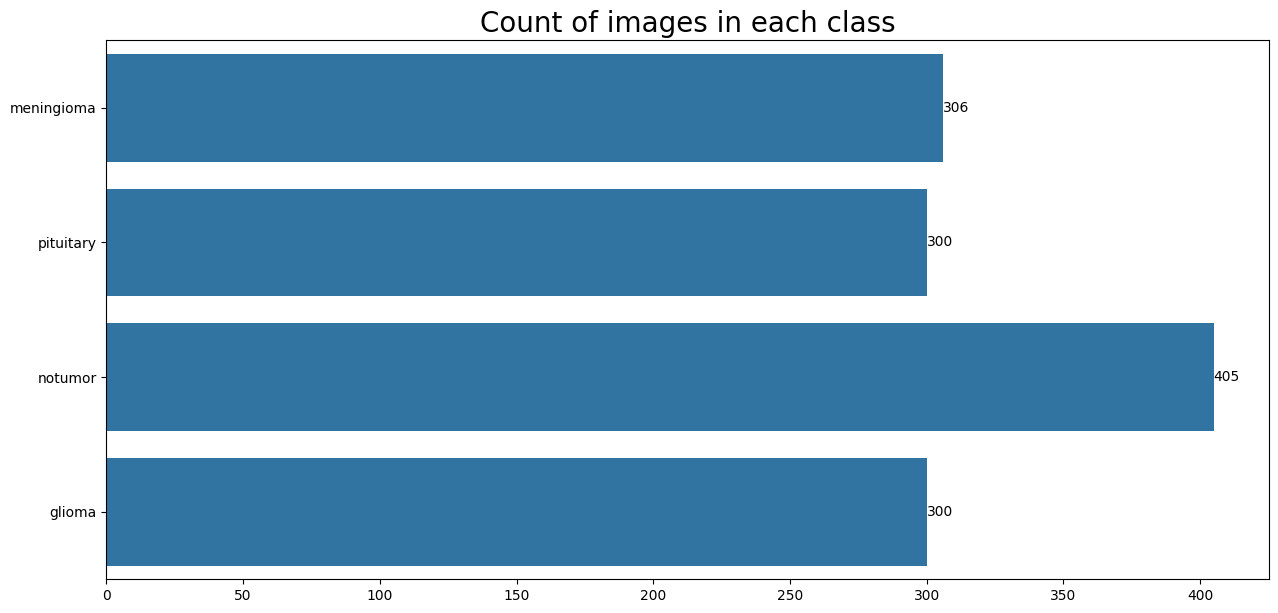

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Splitting dataset

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
1297,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
18,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
367,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,pituitary
73,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma
1120,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
...,...,...
1070,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
860,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,notumor
1284,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,glioma
194,/home/readinggroup/Desktop/K_venv/dl/MRI/Testi...,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

batch_size = 32
img_size = (224, 224)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

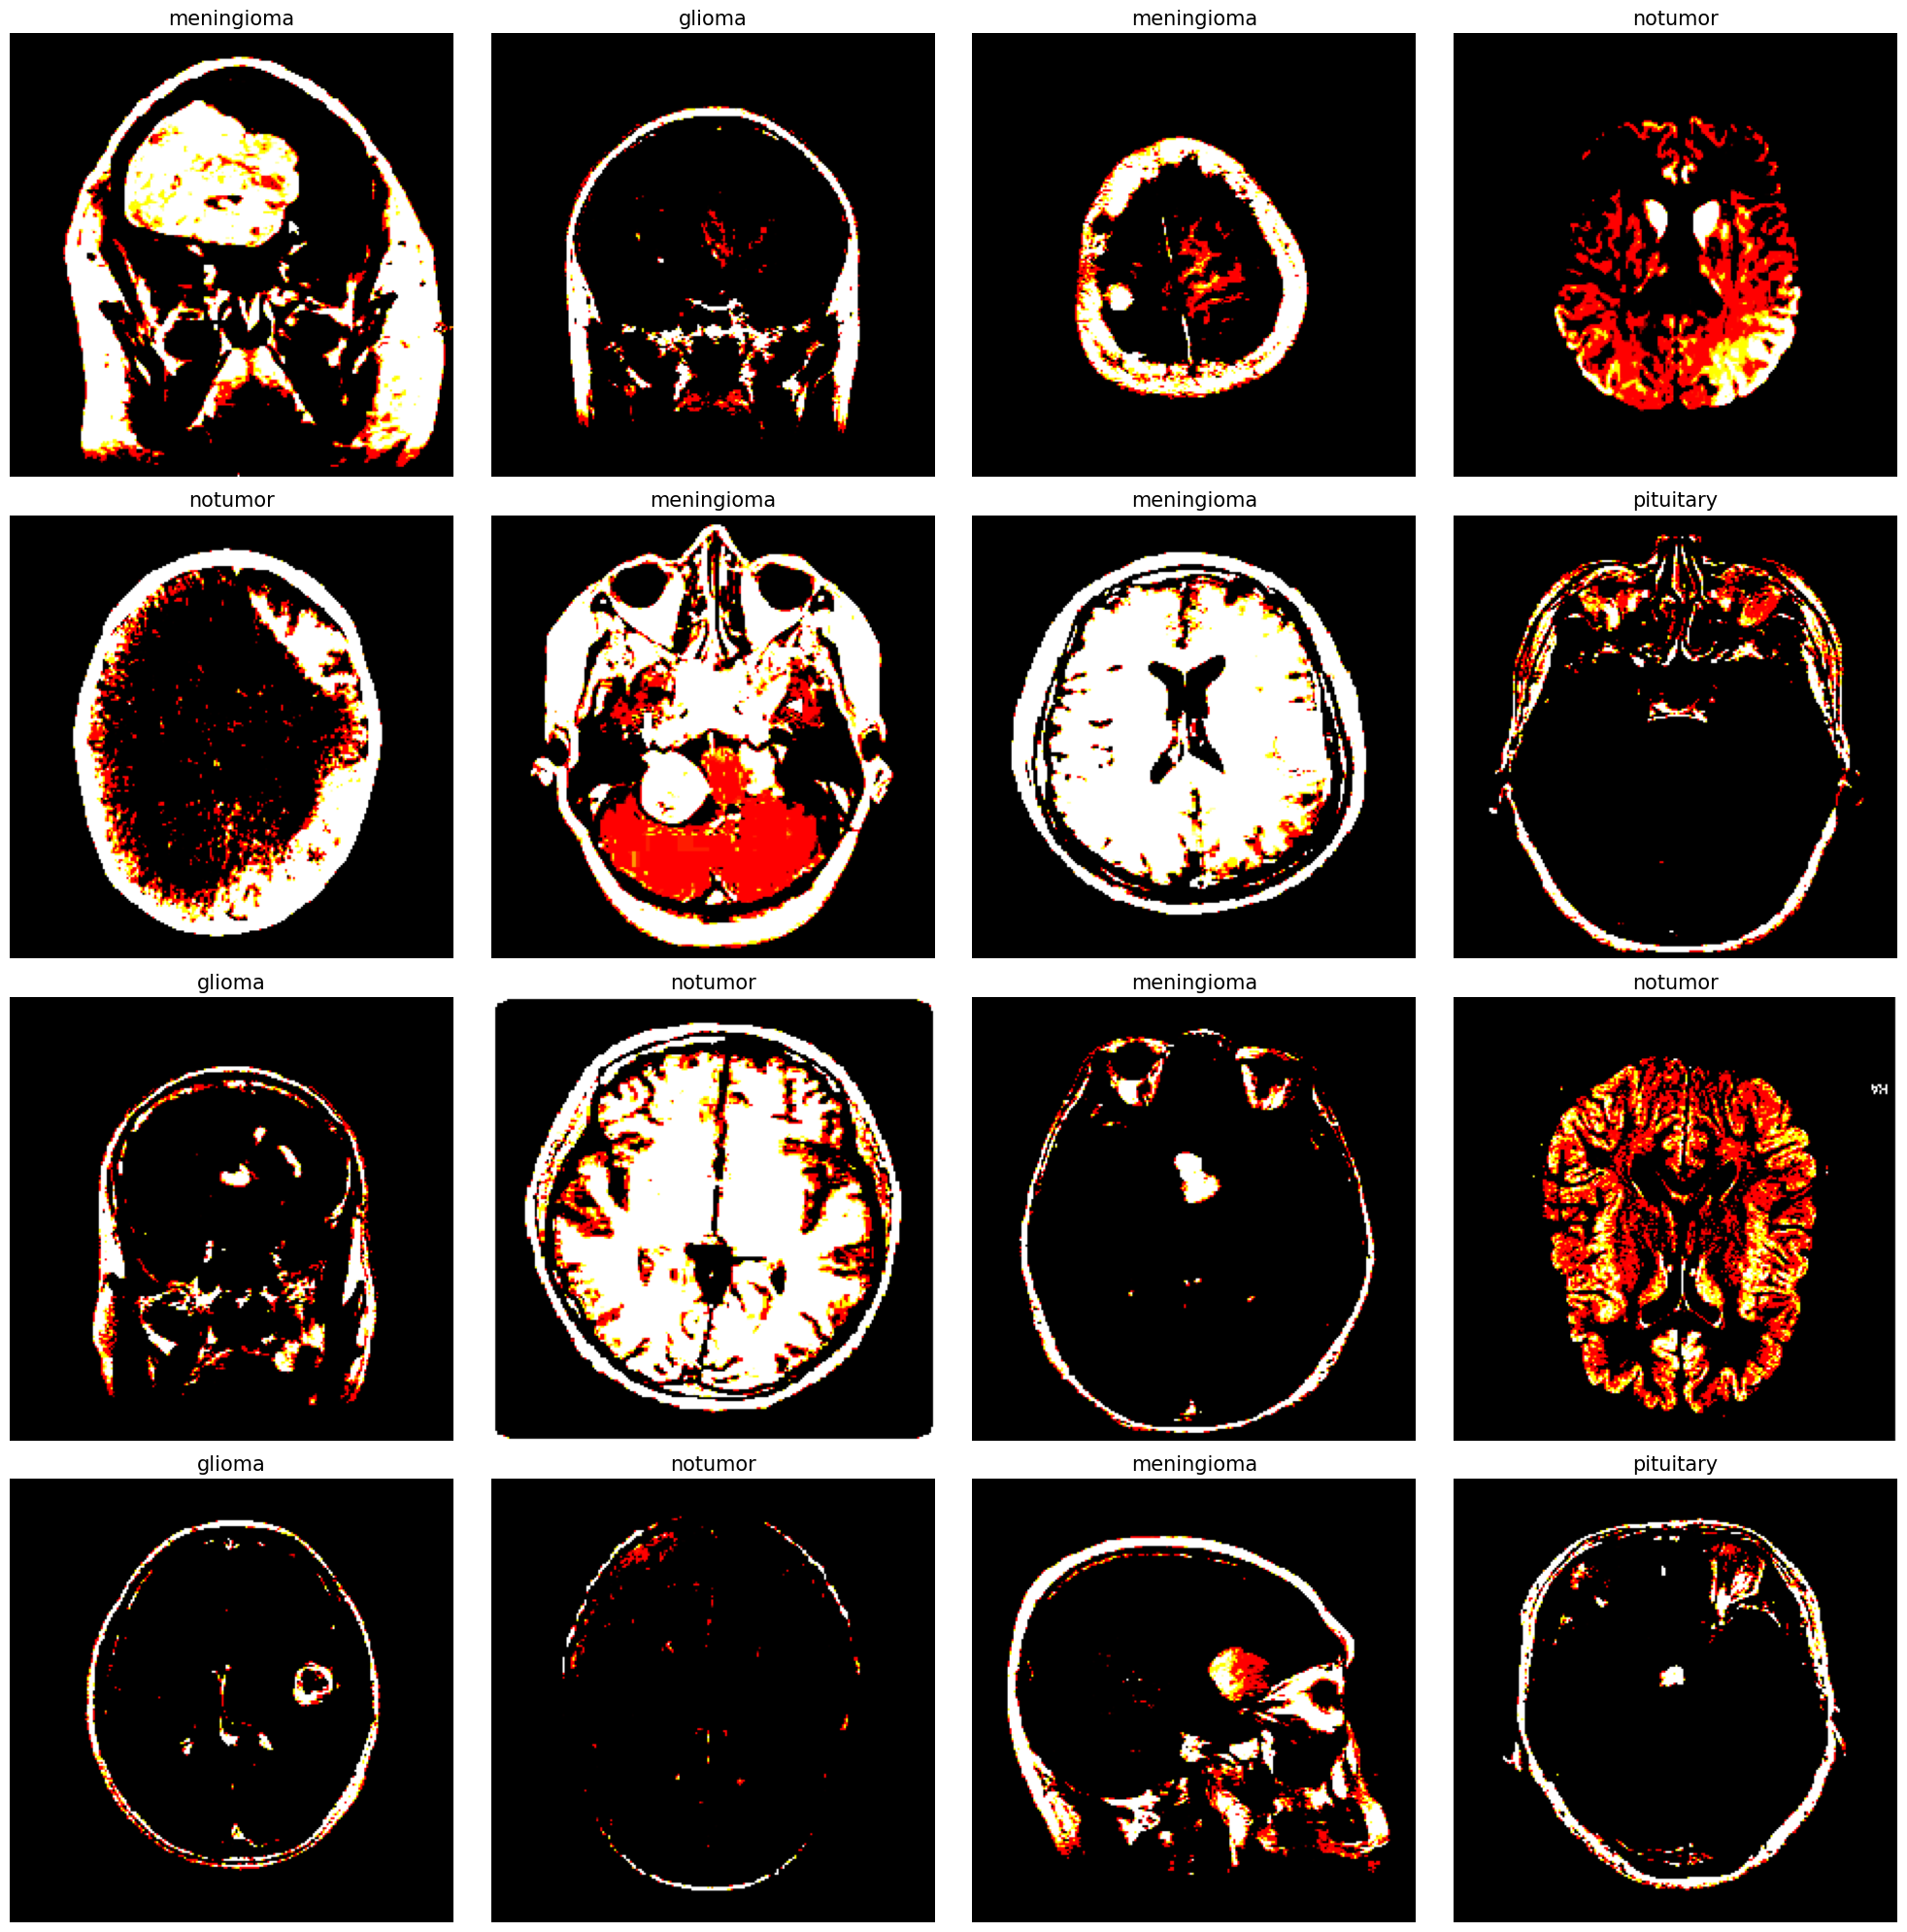

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)

    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building the model

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

# Image shape and number of classes
img_shape = (224, 224, 3)
num_classes = 4

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

# Load ResNet101 base model
base_model = ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape
)

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze last 50 layers for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Base output
x = base_model.output

# Squeeze-and-Excite Style Attention Block
x = layers.Conv2D(512, (1, 1), use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# Attention Context
gap = layers.GlobalAveragePooling2D()(x)
context = layers.Dense(256, activation='relu')(gap)
context = layers.Dense(512, activation='sigmoid')(context)
context = layers.Reshape((1, 1, 512))(context)
x = layers.Multiply()([x, context])

# Spatial dropout
x = layers.SpatialDropout2D(0.3)(x)

# Transition Block
x = layers.Conv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.GlobalAveragePooling2D()(x)

# Dense Block
dense_1 = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
dense_1 = layers.Dropout(0.5)(dense_1)

dense_2 = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_1)
dense_2 = layers.Dropout(0.3)(dense_2)

# Adding Layers
residual = layers.Add()([dense_1, dense_2])

# Final dense layers
x = layers.Dense(128, kernel_regularizer=regularizers.l2(0.01))(residual)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

# Output layer
output = layers.Dense(num_classes, activation='softmax')(x)

# Build model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()


I0000 00:00:1744741191.134010  569556 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 998 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 45,613,316 (174.00 MB)

 Trainable params: 19,903,876 (75.93 MB)

 Non-trainable params: 25,709,440 (98.07 MB)

# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000


I0000 00:00:1744741199.638067  569706 service.cc:152] XLA service 0x7daf58002be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744741199.638080  569706 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-16 00:19:59.865621: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744741201.514748  569706 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-16 00:20:02.487782: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12994', 192 bytes spill stores, 192 bytes spill loads

2025-04-16 00:20:02.933315: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21

  1/179 ━━━━━━━━━━━━━━━━━━━━ 50:17 17s/step - accuracy: 0.2500 - loss: 12.3756 - precision: 0.2500 - recall: 0.1562

I0000 00:00:1744741209.764310  569706 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5934 - loss: 10.9911 - precision: 0.6733 - recall: 0.4908

2025-04-16 00:20:35.528851: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12994', 104 bytes spill stores, 104 bytes spill loads

2025-04-16 00:20:38.010401: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 619.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 00:20:38.010420: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-04-16 00:20:38.107225: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of mem

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5943 - loss: 10.9860 - precision: 0.6743 - recall: 0.4920

2025-04-16 00:20:44.386682: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3485', 484 bytes spill stores, 484 bytes spill loads

2025-04-16 00:20:44.504550: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3485_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-16 00:20:47.724109: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3396', 104 bytes spill stores, 104 bytes spill loads

2025-04-16 00:20:47.945275: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3396', 8 bytes spill stores, 8 bytes spill loads

2025-04-16 00:20:47.994972: I extern

179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 230ms/step - accuracy: 0.5953 - loss: 10.9809 - precision: 0.6752 - recall: 0.4931 - val_accuracy: 0.8824 - val_loss: 8.7051 - val_precision: 0.9036 - val_recall: 0.8733
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 137ms/step - accuracy: 0.9294 - loss: 8.0941 - precision: 0.9384 - recall: 0.9170 - val_accuracy: 0.9450 - val_loss: 6.6992 - val_precision: 0.9477 - val_recall: 0.9405
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.9399 - loss: 6.2722 - precision: 0.9485 - recall: 0.9304 - val_accuracy: 0.9649 - val_loss: 5.1081 - val_precision: 0.9676 - val_recall: 0.9588
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.9564 - loss: 4.8435 - precision: 0.9607 - recall: 0.9507 - val_accuracy: 0.9649 - val_loss: 3.9604 - val_precision: 0.9693 - val_recall: 0.9634
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.9661 - loss: 3.7560 - precision: 0.9698 - recall: 0.9641 - val_accuracy: 0.9710 -

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

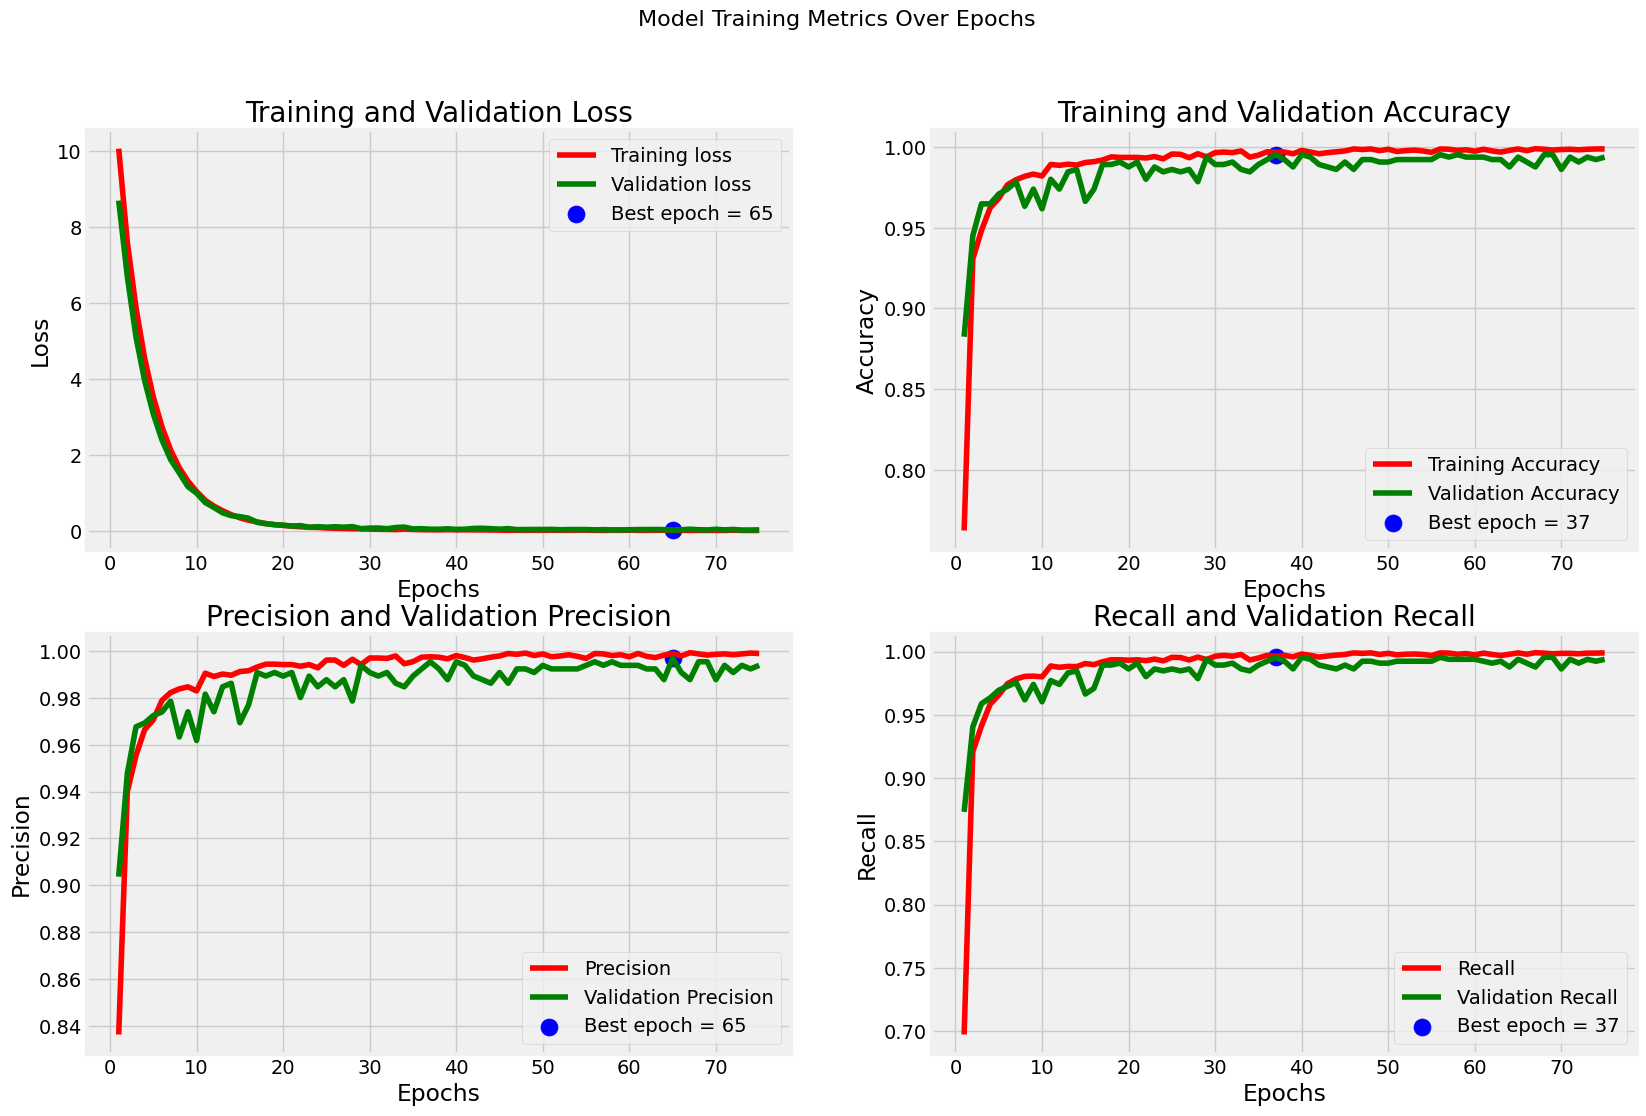

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

print(test_score)

178/179 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9996 - loss: 0.0064 - precision: 0.9996 - recall: 0.9994

2025-04-16 00:51:13.370442: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3485', 52 bytes spill stores, 52 bytes spill loads



179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - accuracy: 0.9996 - loss: 0.0064 - precision: 0.9996 - recall: 0.9994
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9949 - loss: 0.0133 - precision: 0.9983 - recall: 0.9949
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9997 - loss: 0.0058 - precision: 0.9997 - recall: 0.9997
Train Loss: 0.0063
Train Accuracy: 99.95%
--------------------
Validation Loss: 0.0188
Validation Accuracy: 99.39%
--------------------
Test Loss: 0.0133
Test Accuracy: 99.70%
[0.01328708790242672, 0.9969512224197388, 0.9969512224197388, 0.9969512224197388]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


# Confusion matrix

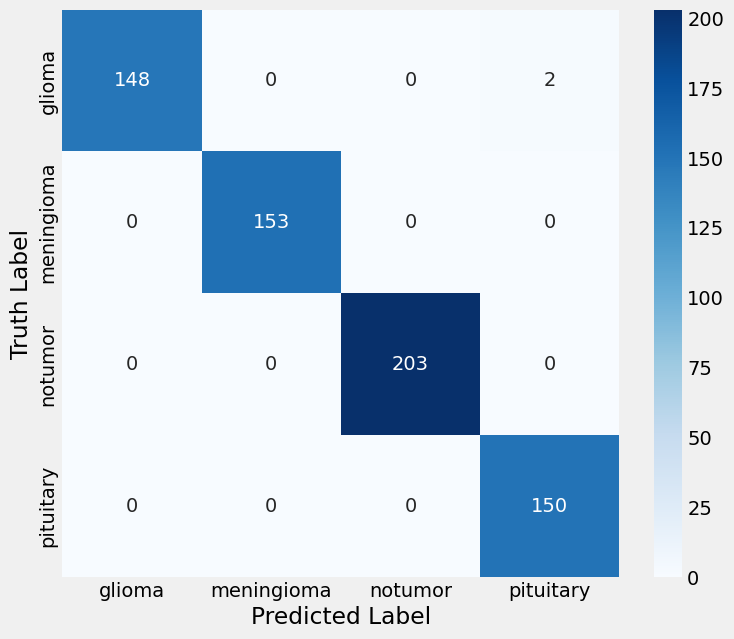

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       203
           3       0.99      1.00      0.99       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    from tensorflow.keras.applications.resnet import preprocess_input

    # Generator label order
    labels = list(tr_gen.class_indices.keys())

    plt.figure(figsize=(12, 12))
    img = Image.open(img_path).convert('RGB')
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)

    img = preprocess_input(img)

    predictions = model.predict(img)
    probs = list(predictions[0])

    # Plotting
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.axis('off')
    plt.title("Input Image")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs, color='skyblue')
    plt.xlabel('Probability', fontsize=15)
    plt.title("Class Probabilities")
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


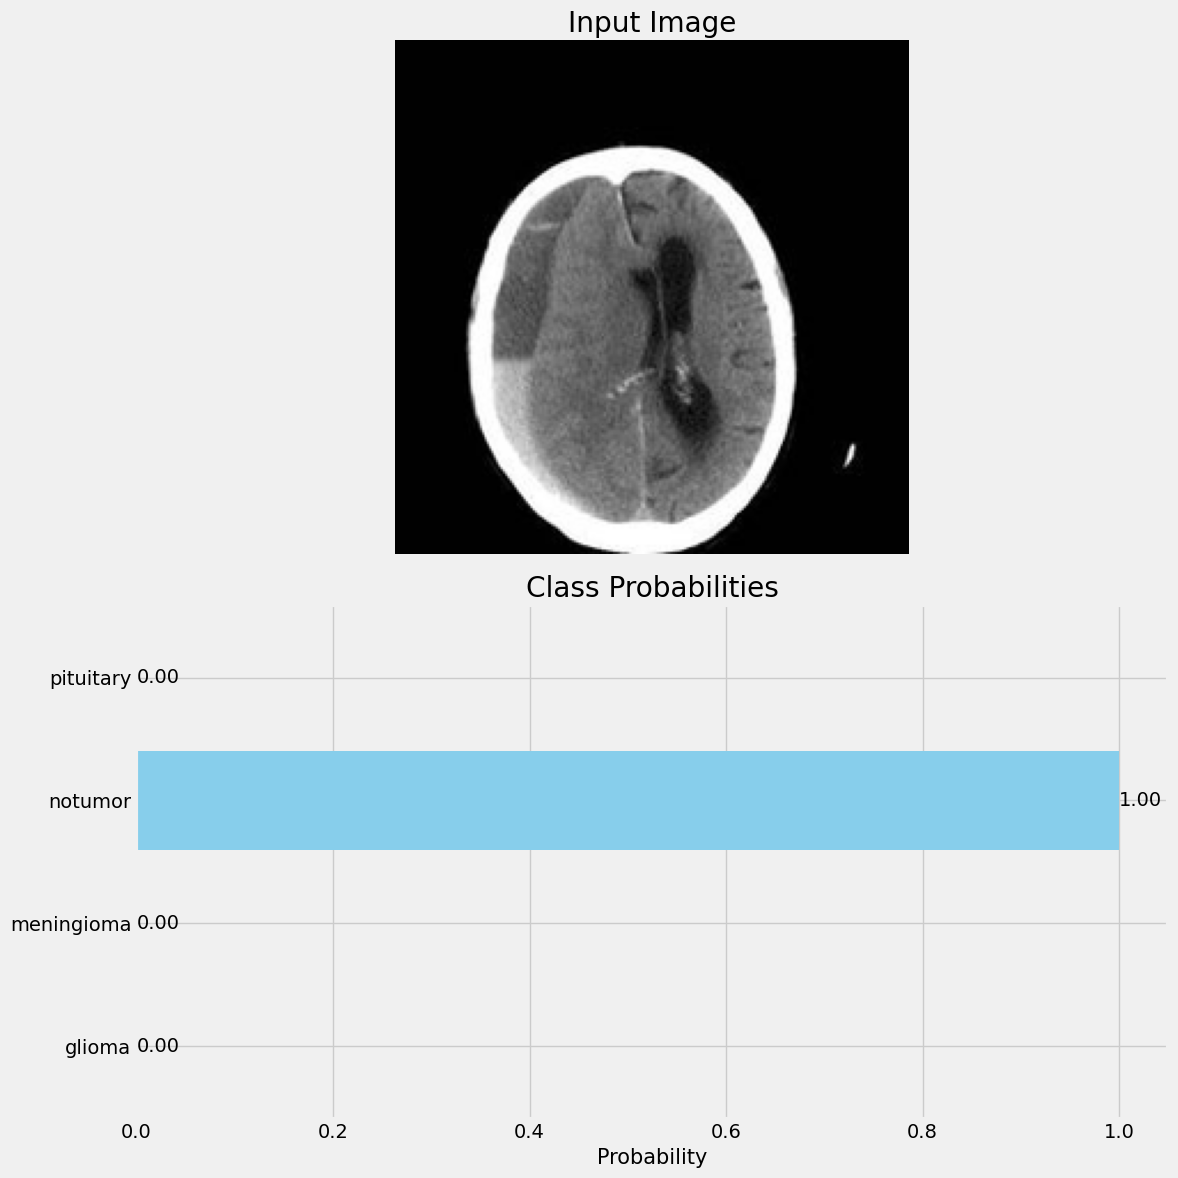

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/notumor/Te-noTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


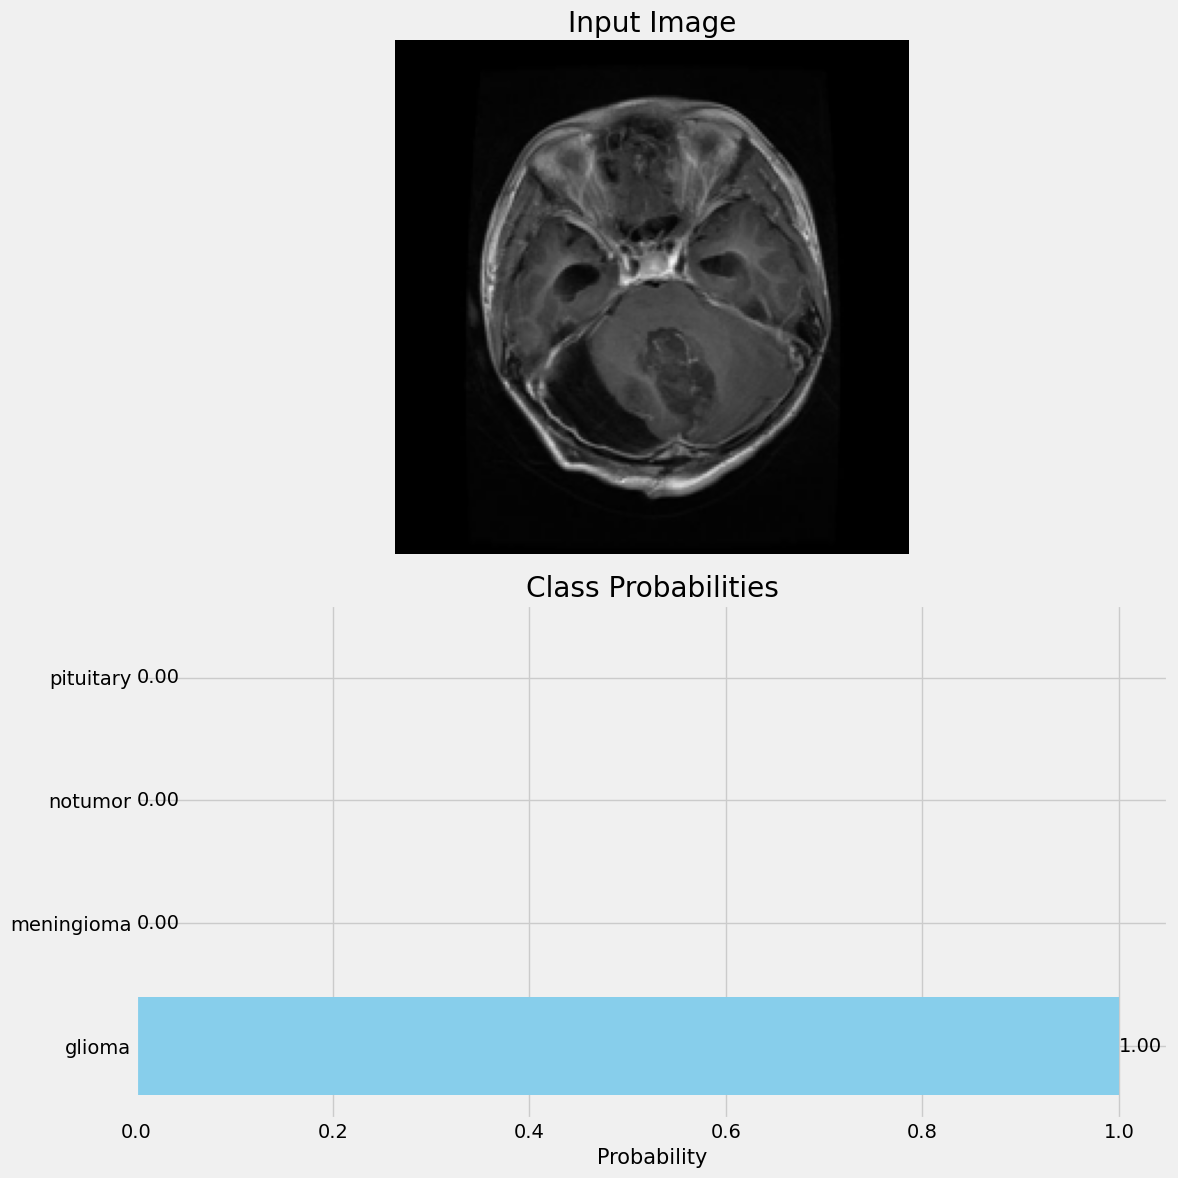

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


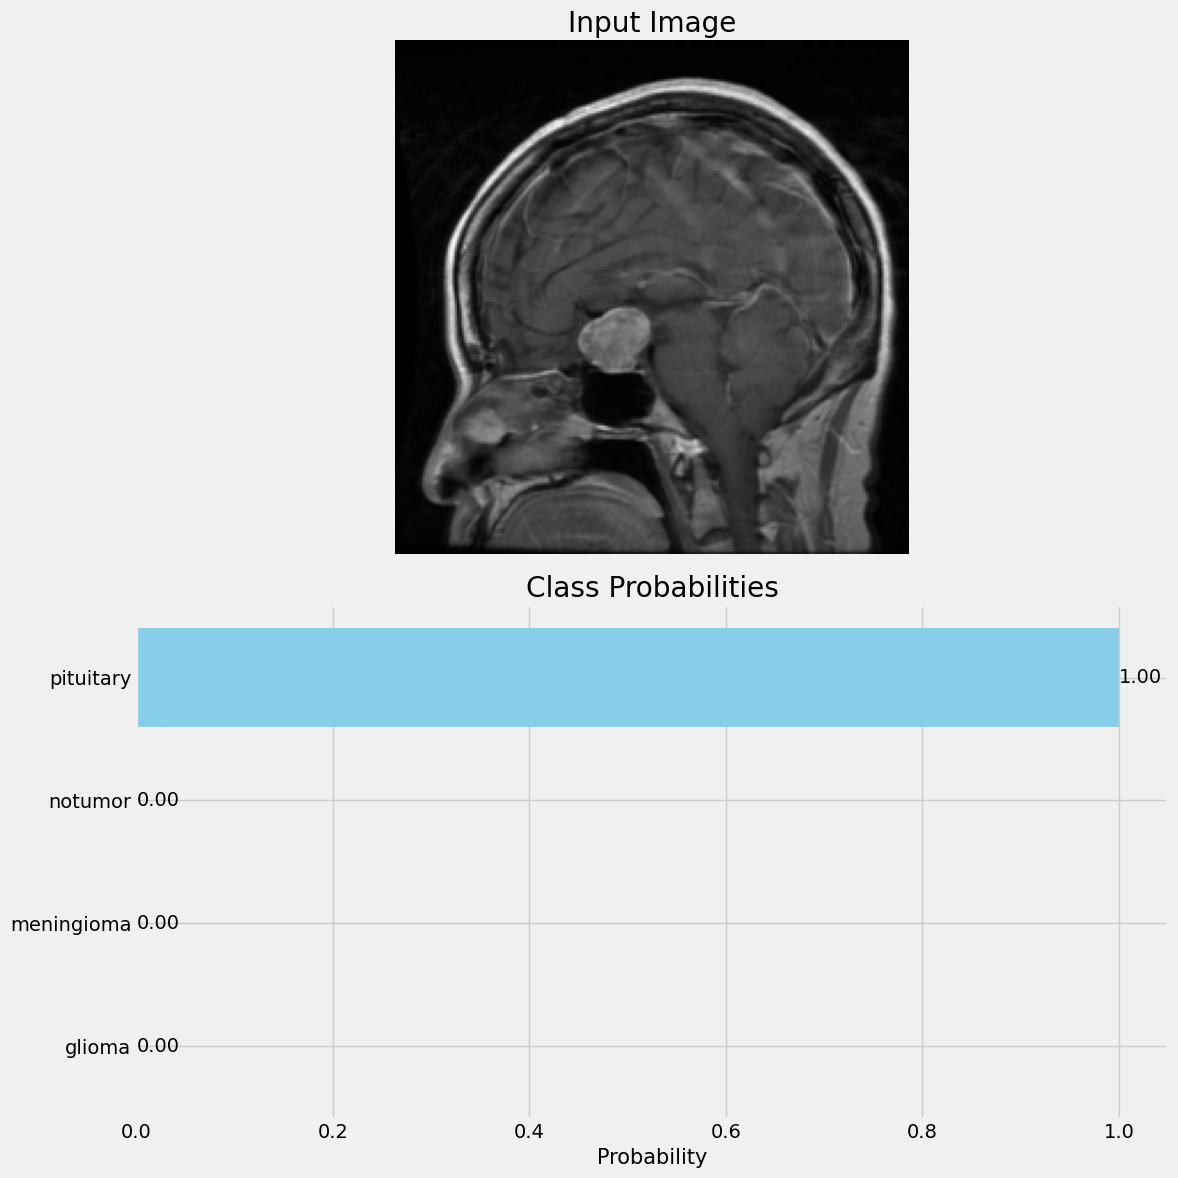

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/pituitary/Te-piTr_0008.jpg')

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()